# runDM v1.0 - examples

*With runDMC, It's Tricky. With runDM, it's not.*

`runDM` is a tool for calculating the running of the couplings of Dark Matter (DM) to the Standard Model (SM) in simplified models with vector mediators. By specifying the mass of the mediator and the couplings of the mediator to SM fields at high energy, the code can be used to calculate the couplings at low energy, taking into account the mixing of all dimension-6 operators. The code can also be used to extract the operator coefficients relevant for direct detection, namely low energy couplings to up, down and strange quarks and to protons and neutrons. See the manual and arXiv:1605.XXXXX for more details.

#### Initialisation

Let's start by importing the runDM module:

In [9]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as pl

import runDM

First, let's specify the couplings at high energy. This will be an 1-D array with 16 elements. `runDM` comes with a number of pre-defined benchmarks, which can be accessed using `setBenchmark`.

In [3]:
c_high = runDM.setBenchmark("UniversalVector")
print "Vector coupling to all SM fermions:", c_high

c_high = runDM.setBenchmark("QuarksAxial")
print "Axial-vector coupling to all quarks:", c_high

Vector coupling to all SM fermions: [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.]
Axial-vector coupling to all quarks: [-1.  1.  1.  0.  0. -1.  1.  1.  0.  0. -1.  1.  1.  0.  0.  0.]


Alternatively, you can specify each coupling individually. You can use initCouplings() to generate an empty array of couplings and then go ahead. But any array of 16 elements with do.

In [4]:
c_high = runDM.initCouplings()
c_high[0] = 1.0
c_high[1] = -1.0
c_high[12] = 1.0
print "User-defined couplings:", c_high

User-defined couplings: [ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


#### runCouplings: running between arbitrary scales

From these high energy couplings (defined at some energy $E_1$), you can obtain the couplings at a different energy scale $E_2$ by using `runCouplings`(c, $E_1$, $E_2$).

The input coupling vector c should always be the list of high energy couplings to fully gauge-invariant operators above the EW scale (see Eq. 4 of the manual) - even if $E_1$ is below $m_Z$. The output is either a list of coefficients for the same operators - if $E_2$ is above $m_Z$ - or the list of coefficients for the low energy operators below the EW scale (Eq. 6 of the manual) - if $E_2$ is below $m_Z$. Don't worry, runDM takes care of the relative values of $E_1$ and $E_2$.


In [5]:
#Run from 1 TeV to 10 GeV
E1 = 1000; E2 = 10;
c_low = runDM.runCouplings(c_high, E1, E2)
print "Low energy couplings:", c_low

Low energy couplings: [  4.97309930e-03   4.97525947e-01   4.97309930e-03  -2.47405288e-03
   4.97524120e-01  -7.47214572e-03  -7.47214572e-03  -7.47214770e-03
  -9.99975006e-01  -5.00024994e-01   2.49935446e-05  -2.49935446e-05
   4.99969939e-01  -2.49935446e-05  -2.49935446e-05  -2.49915408e-05]


#### DDCouplingsQuarks: calculating low-energy DM-quark couplings

If we're only interested in direct detection experiments, we can use the function `DDCouplingsQuarks`(c, $E_1$) to extract the couplings to light quarks. In this case, the code evolves the couplings from energy $E_1$, down to the nuclear energy scale ~ 1 GeV. The output is an array with 5 elements, the vector and axial-vector couplings to the light quarks: $c_q = \left(c_V^{(u)}, c_V^{(d)}, c_A^{(u)}, c_A^{(d)},c_A^{(s)}\right)$. Let's print them out:

In [6]:
#Run from 10 TeV to 1 GeV
E1 = 10000;
c_q = runDM.DDCouplingsQuarks(c_high, E1)

couplings_str = ['c_V^u','c_V^d','c_A^u','c_A^d','c_A^s']

for k in range(5):
    print couplings_str[k], "=", c_q[k]

c_V^u = 0.00969944442316
c_V^d = 0.495184784891
c_A^u = -0.999930985796
c_A^d = -0.500069014204
c_A^s = -6.90142041621e-05


Now, let's take a look at the value of the low-energy light quark couplings (evaluated at $\mu_N \sim 1 \, \mathrm{GeV}$) as a function of the mediator mass $m_V$. 

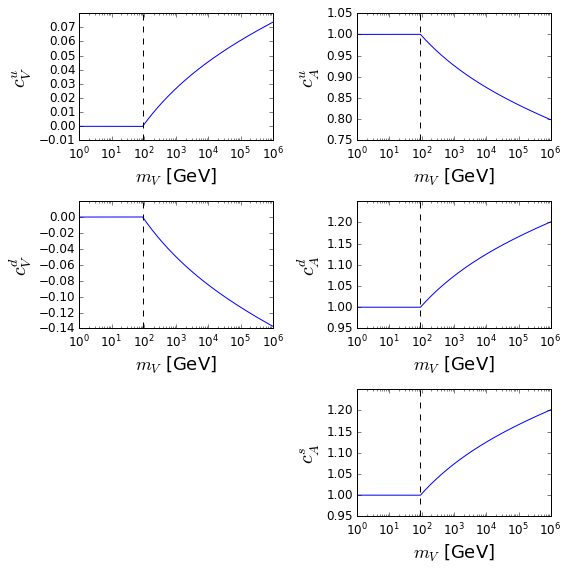

In [7]:
#Set the value of the high energy couplings
c_high = runDM.setBenchmark("QuarksAxial")

#Calculate the low energy couplings
mV = np.logspace(0, 6, 1000)
c_q = runDM.DDCouplingsQuarks(c_high, mV)
    
#Now let's do some plotting
f, axarr = pl.subplots(3,2 ,figsize=(8,8))

for k in range(5):
    if (k < 2): #Vector currents
        ax = axarr[k%3, 0]
    else:       #Axial-vector currents
        ax = axarr[(k+1)%3, 1]
        
    ax.semilogx(mV, c_q[:,k])
    
    ax.set_xlabel(r'$m_V$ [GeV]', fontsize=18.0)
    ax.set_ylabel(r'$'+couplings_str[k]+'$', fontsize=20.0)
    ax.axvline(91.1875, color='k', linestyle='--')
    ax.set_xlim(1.0, 10**6)
    ax.get_yticklabels()[-1].set_visible(False)
    ax.tick_params(axis='both', labelsize=12.0)
    
axarr[2,0].set_axis_off()
pl.tight_layout()



#### DDCouplingsNR: calculating low energy non-relativistic DM-nucleon couplings

The function `DDCouplingsNR`(c, E1, mx, DMcurrent, N) calculates the running of the operators to the nuclear energy scale, but it also performs the embedding of the quarks in the nucleon (N = 'p', 'n') and the matching onto the non-relativisitic (NR) DM-nucleon operators, defined in [arXiv:1203.3542](http://arxiv.org/abs/1203.3542). In order to perform the matching, the user must specify mx (DM mass in GeV) and DMcurrent, the DM interaction structure. 

The output is a list of coefficients of the first 12 NR operators, with numbering matching that of [arXiv:1203.3542](http://arxiv.org/abs/1203.3542) and [arXiv:1307.5955](http://arxiv.org/abs/1307.5955) (but remember that python array indices start at zero, so $O_7^{NR}$ is at index 6):

In [8]:
#Set high energy couplings
chigh = runDM.setBenchmark("QuarksAxial")

#Set DM parameters
E1 = 10000; mx = 100; DMcurrent = "vector";
print "NR DM-proton couplings:", \
    runDM.DDCouplingsNR(chigh, E1, mx, DMcurrent, "p")
print "NR DM-neutron couplings:", \
    runDM.DDCouplingsNR(chigh, E1, mx, DMcurrent, "n")

NR DM-proton couplings: [  2.29595716e-08   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.54824658e-06   0.00000000e+00
   1.54824658e-08   0.00000000e+00   0.00000000e+00   0.00000000e+00]
NR DM-neutron couplings: [ -4.68791382e-07   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -3.94845846e-06   0.00000000e+00
   3.94845846e-08   0.00000000e+00   0.00000000e+00   0.00000000e+00]
